In [1]:
import numpy as np
import pandas as pd
import datetime
import io

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')
plt.rc('figure', figsize=(16,10))
plt.rc('lines', markersize=4)

In [2]:
df = pd.read_csv('energydata_complete.csv')

In [3]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [4]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [5]:
df.isna().values.any()

False

In [6]:
df1 = pd.DataFrame(df, columns=['Appliances', 'T1'])

In [7]:
df1.head()

,Appliances,T1
0,60,19.89
1,60,19.89
2,50,19.89
3,50,19.89
4,60,19.89


In [8]:

col_temp = ["T1","T2","T3","T4","T5","T6","T7","T8","T9"]

col_hum = ["RH_1","RH_2","RH_3","RH_4","RH_5","RH_6","RH_7","RH_8","RH_9"]

col_weather = ["T_out", "Tdewpoint","RH_out","Press_mm_hg", "Windspeed","Visibility"] 
col_light = ["lights"]

col_randoms = ["rv1", "rv2"]

col_target = ["Appliances"]


array([[<AxesSubplot:title={'center':'Appliances'}>,
        <AxesSubplot:title={'center':'lights'}>,
        <AxesSubplot:title={'center':'T1'}>,
        <AxesSubplot:title={'center':'RH_1'}>,
        <AxesSubplot:title={'center':'T2'}>],
       [<AxesSubplot:title={'center':'RH_2'}>,
        <AxesSubplot:title={'center':'T3'}>,
        <AxesSubplot:title={'center':'RH_3'}>,
        <AxesSubplot:title={'center':'T4'}>,
        <AxesSubplot:title={'center':'RH_4'}>],
       [<AxesSubplot:title={'center':'T5'}>,
        <AxesSubplot:title={'center':'RH_5'}>,
        <AxesSubplot:title={'center':'T6'}>,
        <AxesSubplot:title={'center':'RH_6'}>,
        <AxesSubplot:title={'center':'T7'}>],
       [<AxesSubplot:title={'center':'RH_7'}>,
        <AxesSubplot:title={'center':'T8'}>,
        <AxesSubplot:title={'center':'RH_8'}>,
        <AxesSubplot:title={'center':'T9'}>,
        <AxesSubplot:title={'center':'RH_9'}>],
       [<AxesSubplot:title={'center':'T_out'}>,
        <AxesSubpl

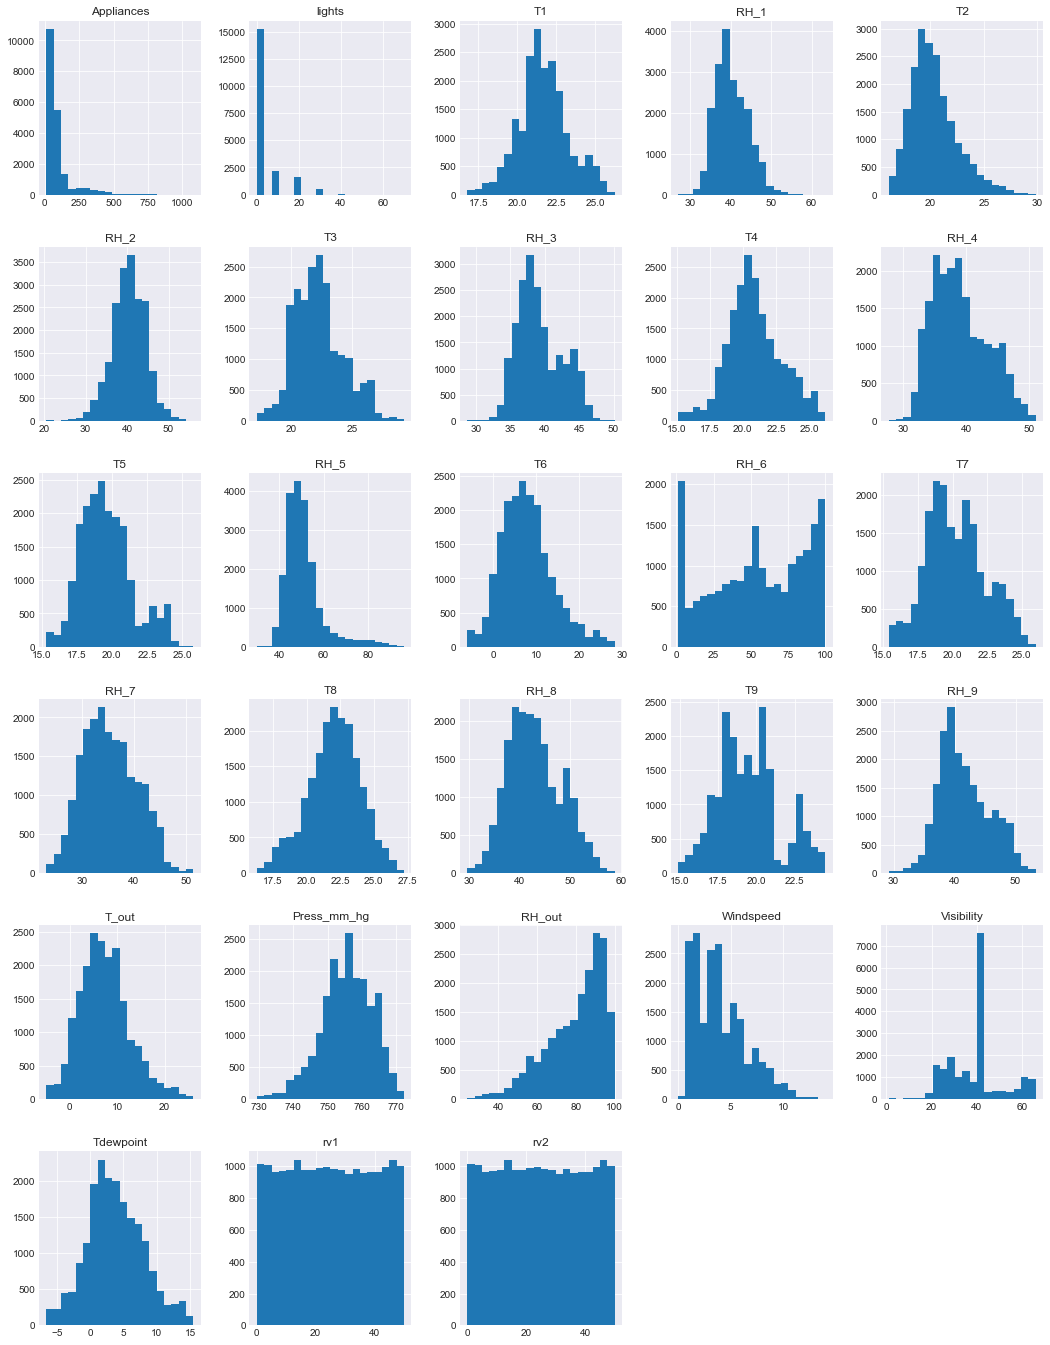

In [9]:
df.hist(bins = 20, figsize = (18,24))

In [10]:
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

# To understand the timeseries variation of the applaince energy consumption
visData = go.Scatter( x= df.date  ,  mode = "lines", y = df.Appliances )
layout = go.Layout(title = 'Appliance energy consumption measurement' , xaxis=dict(title='Date'), yaxis=dict(title='Appliances (Wh)'))
fig = go.Figure(data=[visData],layout=layout)

iplot(fig)

In [11]:
df[col_temp].describe()

,T1,T2,T3,T4,T5,T6,T7,T8,T9
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,21.686571,20.341219,22.267611,20.855335,19.592106,7.910939,20.267106,22.029107,19.485828
std,1.606066,2.192974,2.006111,2.042884,1.844623,6.090347,2.109993,1.956162,2.014712
min,16.790000,16.100000,17.200000,15.100000,15.330000,-6.065000,15.390000,16.306667,14.890000
25%,20.760000,18.790000,20.790000,19.530000,18.277500,3.626667,18.700000,20.790000,18.000000
50%,21.600000,20.000000,22.100000,20.666667,19.390000,7.300000,20.033333,22.100000,19.390000
75%,22.600000,21.500000,23.290000,22.100000,20.619643,11.256000,21.600000,23.390000,20.600000
max,26.260000,29.856667,29.236000,26.200000,25.795000,28.290000,26.000000,27.230000,24.500000


In [12]:
df[col_hum].describe()

,RH_1,RH_2,RH_3,RH_4,RH_5,RH_6,RH_7,RH_8,RH_9
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,40.259739,40.420420,39.242500,39.026904,50.949283,54.609083,35.388200,42.936165,41.552401
std,3.979299,4.069813,3.254576,4.341321,9.022034,31.149806,5.114208,5.224361,4.151497
min,27.023333,20.463333,28.766667,27.660000,29.815000,1.000000,23.200000,29.600000,29.166667
25%,37.333333,37.900000,36.900000,35.530000,45.400000,30.025000,31.500000,39.066667,38.500000
50%,39.656667,40.500000,38.530000,38.400000,49.090000,55.290000,34.863333,42.375000,40.900000
75%,43.066667,43.260000,41.760000,42.156667,53.663333,83.226667,39.000000,46.536000,44.338095
max,63.360000,56.026667,50.163333,51.090000,96.321667,99.900000,51.400000,58.780000,53.326667


In [13]:
df[col_weather].describe()

,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed,Visibility
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,7.411665,3.760707,79.750418,755.522602,4.039752,38.330834
std,5.317409,4.194648,14.901088,7.399441,2.451221,11.794719
min,-5.000000,-6.600000,24.000000,729.300000,0.000000,1.000000
25%,3.666667,0.900000,70.333333,750.933333,2.000000,29.000000
50%,6.916667,3.433333,83.666667,756.100000,3.666667,40.000000
75%,10.408333,6.566667,91.666667,760.933333,5.500000,40.000000
max,26.100000,15.500000,100.000000,772.300000,14.000000,66.000000


In [14]:
df[col_target].describe()

,Appliances
count,19735.000000
mean,97.694958
std,102.524891
min,10.000000
25%,50.000000
50%,60.000000
75%,100.000000
max,1080.000000


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

train, test = train_test_split(df, test_size = 0.2, random_state=50)


feature_vars = train[col_temp + col_hum + col_weather + col_light + col_randoms]
target_vars = train[col_target] 

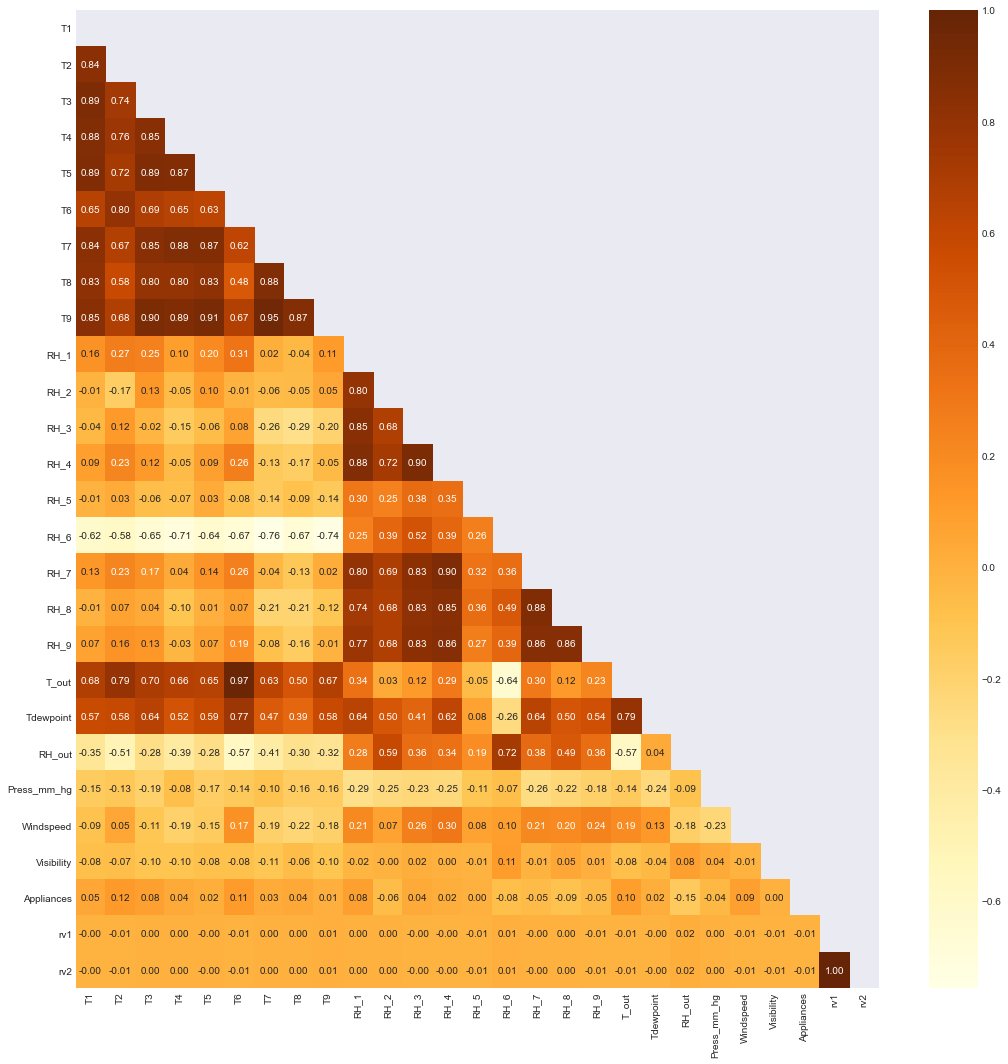

In [17]:
train_corr = train[col_temp + col_hum + col_weather +col_target+col_randoms]
corr = train_corr.corr()
# Mask the repeated values
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(18, 18))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap="YlOrBr", annot=True, fmt=".2f" , mask=mask,)

plt.show()

In [18]:
X_train = train[feature_vars.columns]
Y_train = train[target_vars.columns]

X_test = test[feature_vars.columns]
Y_test = test[target_vars.columns]

X_train.drop(["rv1","rv2","Visibility","T6","T9","lights"], axis=1 , inplace=True)
X_test.drop(["rv1","rv2","Visibility","T6","T9", "lights"], axis=1, inplace=True)

C:\Users\kaust\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Extrassss- Standard Scaler

In [20]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()



train = train[list(X_train.columns.values) + col_target ]
test = test[list(X_test.columns.values) + col_target ]


sc_train = pd.DataFrame(columns=train.columns , index=train.index)
sc_train[sc_train.columns] = sc.fit_transform(train)
sc_test= pd.DataFrame(columns=test.columns , index=test.index)
sc_test[sc_test.columns] = sc.fit_transform(test)

In [21]:
X_train =  sc_train.drop(['Appliances'] , axis=1)
Y_train = sc_train['Appliances']

X_test =  sc_test.drop(['Appliances'] , axis=1)
Y_test = sc_test['Appliances']

Extras End

In [22]:
mulReg = LinearRegression()
mulReg.fit(X_train, Y_train)

LinearRegression()

In [23]:
mulReg.coef_


array([-0.01224095, -0.37892173,  0.43010587,  0.01932914, -0.12036869,
       -0.16241761,  0.17637961,  0.6286917 , -0.61029803,  0.17692904,
        0.11703204,  0.02687064,  0.08084631, -0.03698385, -0.33514733,
       -0.08115941, -0.06001403,  0.09311535, -0.06303389,  0.01325481,
        0.05159502])

In [24]:
mulReg.intercept_

1.2455043511363693e-15

In [25]:
Y_pred = mulReg.predict(X_test)

In [26]:
from sklearn import metrics
metrics.r2_score(Y_test, Y_pred)

0.15557531214921272

In [28]:

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(Y_test, Y_pred))

Mean Absolute Error: 0.5229763055637504
Mean Squared Error: 0.8444246878507873
Root Mean Squared Error: 0.9189258337051948
Mean Absolute Percentage Error: 1.459894457373644


In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor

Models Initialization

In [30]:
models = [
    ['Multiple Linear Regressor', LinearRegression()],
    ['Kernel Ridge Regressor', KernelRidge(alpha=1.0)],
    ['Stochastic Gradient Descent(SGD) Regressor', SGDRegressor(max_iter = 1000, penalty = "elasticnet",
                                                           loss = 'huber',tol = 1e-3, average = True)],
    ['Support Vector Regressor(SVR)' , SVR(kernel='rbf')],
    ['KNeighborRegressor', KNeighborsRegressor()],
    ['Random Forest Regressor',RandomForestRegressor()],
    ['ExtraTree Regressor :',ExtraTreesRegressor()],
    ['Gradient Boosting Regressor: ', GradientBoostingRegressor()],
    ['Light GBM Regressor', LGBMRegressor()],
    ['MLPRegressor: ', MLPRegressor(max_iter=1000, learning_rate_init=0.01, alpha=0.0, activation='relu', 
                                    solver='adam', learning_rate='adaptive')]
]

In [31]:
import time
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [32]:
model_eval= []
for name,curr in models :
    curr_model_eval = {}
    curr.random_state = 78
    curr_model_eval["Name"] = name
    
    start = time.time()
    curr.fit(X_train, Y_train)
    end = time.time()
    
    curr_model_eval["Train Time"] = end - start
    
    curr_model_eval["Train MAE"] = mean_absolute_error(Y_train,curr.predict(X_train))
    curr_model_eval["Train MSE"] = mean_squared_error(Y_train,curr.predict(X_train))
    curr_model_eval["Train RMSE"] = np.sqrt(mean_squared_error(Y_train,curr.predict(X_train)))
    curr_model_eval["Train R2 Score"] = metrics.r2_score(Y_train,curr.predict(X_train))
    
    curr_model_eval["Test MAE"] = mean_absolute_error(Y_test,curr.predict(X_test))
    curr_model_eval["Test MSE"] = mean_squared_error(Y_test,curr.predict(X_test))
    curr_model_eval["Test RMSE"] = np.sqrt(mean_squared_error(Y_test,curr.predict(X_test)))
    curr_model_eval["Test R2 Score"] = metrics.r2_score(Y_test,curr.predict(X_test))
    
    model_eval.append(curr_model_eval)
    

In [33]:
model_eval

[{'Name': 'Multiple Linear Regressor',
  'Train Time': 0.007978200912475586,
  'Train MAE': 0.5291133568208392,
  'Train MSE': 0.8714583320444296,
  'Train RMSE': 0.9335193260154979,
  'Train R2 Score': 0.12854166795557032,
  'Test MAE': 0.5229763055637504,
  'Test MSE': 0.8444246878507873,
  'Test RMSE': 0.9189258337051948,
  'Test R2 Score': 0.15557531214921272},
 {'Name': 'Kernel Ridge Regressor',
  'Train Time': 42.95829892158508,
  'Train MAE': 0.5290930218069129,
  'Train MSE': 0.8714585317829829,
  'Train RMSE': 0.9335194329969693,
  'Train R2 Score': 0.12854146821701695,
  'Test MAE': 0.522956783429828,
  'Test MSE': 0.8444421452237355,
  'Test RMSE': 0.9189353324493164,
  'Test R2 Score': 0.1555578547762645},
 {'Name': 'Stochastic Gradient Descent(SGD) Regressor',
  'Train Time': 0.07813906669616699,
  'Train MAE': 0.4422866699724969,
  'Train MSE': 1.0116617002612553,
  'Train RMSE': 1.005813949128394,
  'Train R2 Score': -0.01166170026125557,
  'Test MAE': 0.4443574165879083

In [40]:
dfeval = pd.DataFrame(model_eval)
dfeval.round(6)

,Name,Train Time,Train MAE,Train MSE,Train RMSE,Train R2 Score,Test MAE,Test MSE,Test RMSE,Test R2 Score
0,Multiple Linear Regressor,0.007978,0.529113,0.871458,0.933519,0.128542,0.522976,0.844425,0.918926,0.155575
1,Kernel Ridge Regressor,42.958299,0.529093,0.871459,0.933519,0.128541,0.522957,0.844442,0.918935,0.155558
2,Stochastic Gradient Descent(SGD) Regressor,0.078139,0.442287,1.011662,1.005814,-0.011662,0.444357,0.998569,0.999284,0.001431
3,Support Vector Regressor(SVR),10.552370,0.355720,0.770237,0.877631,0.229763,0.364863,0.762993,0.873495,0.237007
4,KNeighborRegressor,0.058062,0.247948,0.308878,0.555768,0.691122,0.323103,0.509408,0.713728,0.490592
5,Random Forest Regressor,24.334139,0.112647,0.059315,0.243547,0.940685,0.325268,0.432658,0.657767,0.567342
6,ExtraTree Regressor :,7.252245,0.000000,0.000000,0.000000,1.000000,0.282223,0.348567,0.590395,0.651433
7,Gradient Boosting Regressor:,5.488792,0.453801,0.682944,0.826404,0.317056,0.474192,0.752444,0.867435,0.247556
8,Light GBM Regressor,0.457851,0.320395,0.373752,0.611352,0.626248,0.386491,0.560457,0.748637,0.439543
9,MLPRegressor:,22.331243,0.423150,0.502971,0.709205,0.497029,0.450531,0.584146,0.764294,0.415854


Text(0.5, 1.0, 'RMSE Scores')

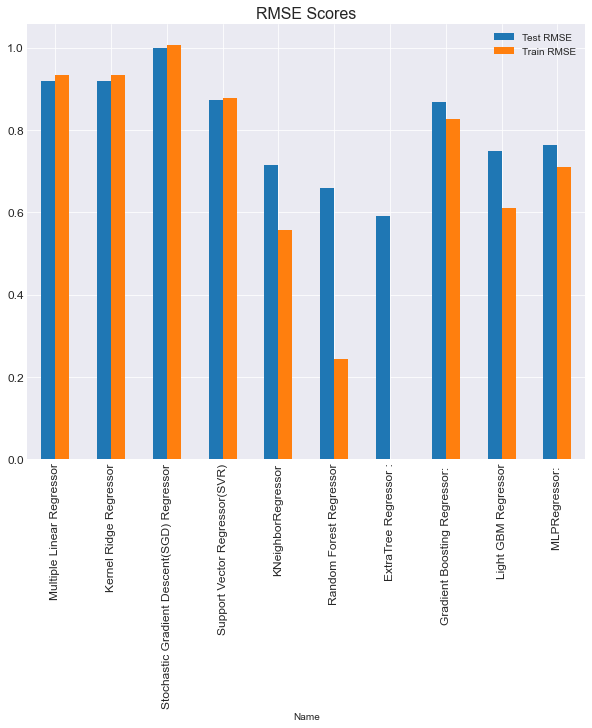

In [36]:
dfeval.plot(x="Name", y=['Test RMSE', 'Train RMSE'], kind="bar", figsize= (10,8)) ;
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("RMSE Scores", fontsize=16)

Text(0.5, 1.0, 'R2 Scores')

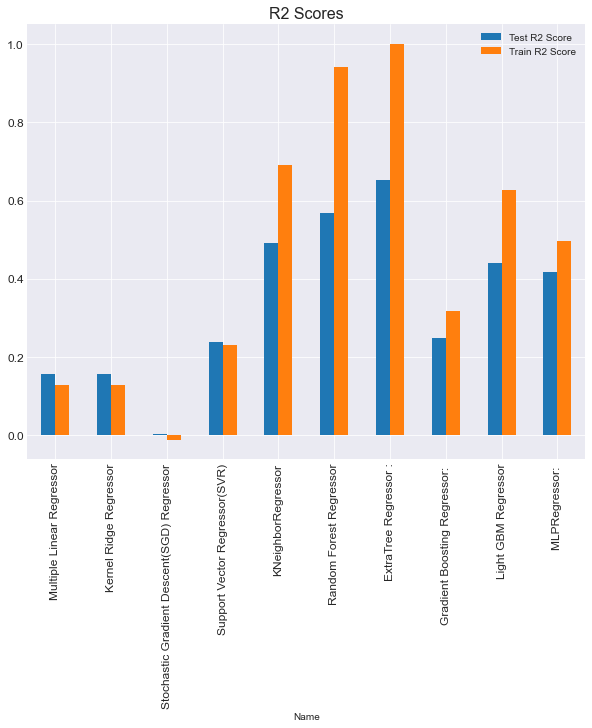

In [37]:
dfeval.plot(x="Name", y=['Test R2 Score' , 'Train R2 Score'], kind="bar", figsize= (10,8)) ;
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("R2 Scores", fontsize=16)

Text(0.5, 1.0, 'MAE Scores')

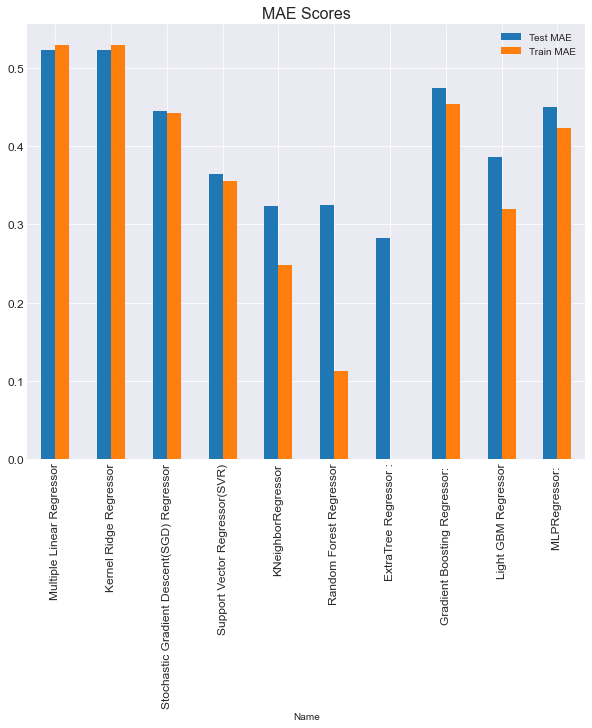

In [38]:
dfeval.plot(x="Name", y=['Test MAE', 'Train MAE'], kind="bar", figsize= (10,8)) ;
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("MAE Scores", fontsize=16)

Text(0.5, 1.0, 'MSE Scores')

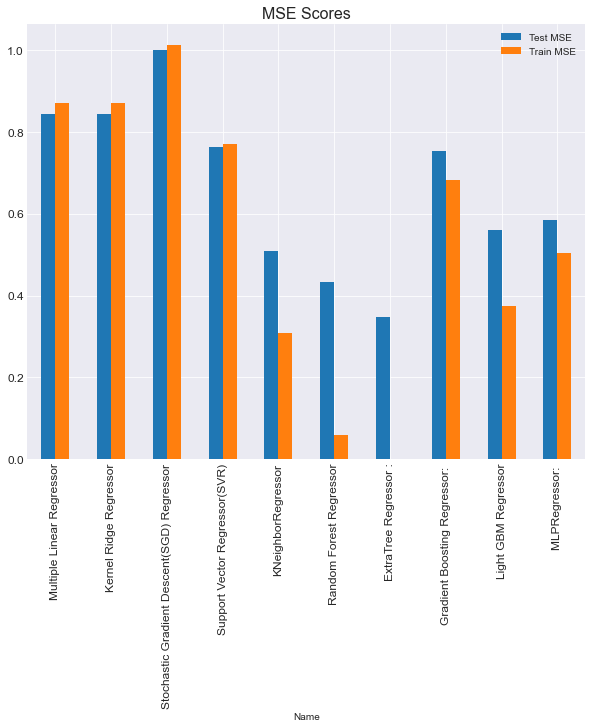

In [39]:
dfeval.plot(x="Name", y=['Test MSE', 'Train MSE'], kind="bar", figsize= (10,8)) ;
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("MSE Scores", fontsize=16)